<a href="https://colab.research.google.com/github/AnaRecio/Ana-Recio/blob/Tareas/Caso_Pr%C3%A1ctico_Titanic_AnaRecio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 02 - Análisis Caso Titanic**

Instrucciones:
Adjuntar Archivo en formato Google Colab (extensión: ipynb ) con código desarrollado.
Se adjunta el notebook donde se descarga el dataset y el diccionario de datos.
- En el notebook se contener los 5 hallazgos relevantes.
- El nombre del archivo a entregar es el siguiente: Caso_Practico_Titanic_NombreAlumno.ipynb
- Objetivo de la tarea: Encontrar 5 hallazgos relevantes

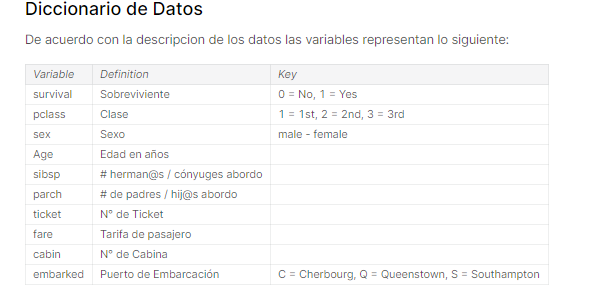

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [4]:
titanic.shape

(891, 15)

In [ ]:
#Objetivo: Encontrar 5 hallazgos relevantes

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic=titanic.drop('deck', axis=1)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [6]:
titanic.groupby('survived').size()

survived
0    549
1    342
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


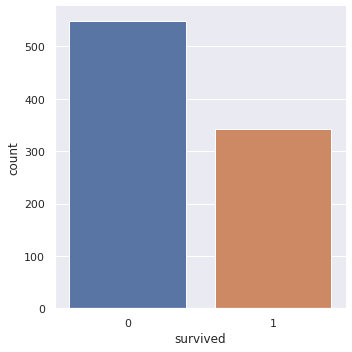

In [9]:
sns.factorplot('survived',data=titanic,kind="count")

In [10]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


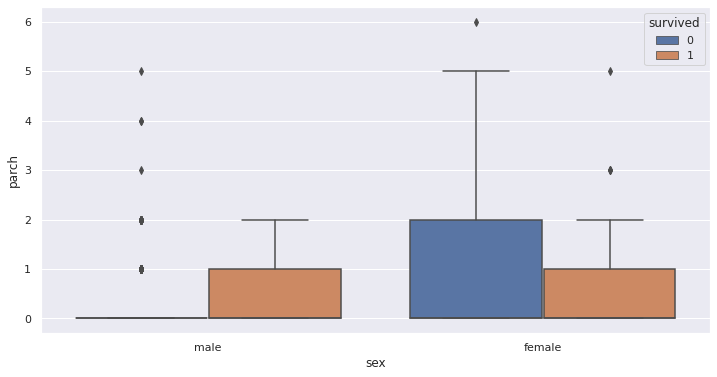

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sex",y="parch", hue="survived", data=titanic)

In [13]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    
    return(x)

In [18]:
titanic_tratamiento = titanic[['sibsp', 'parch']].apply(lambda x: outlier_capping(x))

In [19]:
titanic_tratamiento.head(5)

,sibsp,parch
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


In [20]:
titanic = pd.concat([titanic.drop(columns=['sibsp', 'parch']), titanic_tratamiento], axis=1,)

In [22]:
titanic.tail(5)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,sibsp,parch
886,0,2,male,27.0,13.00,S,Second,man,True,Southampton,no,True,0.0,0.0
887,1,1,female,19.0,30.00,S,First,woman,False,Southampton,yes,True,0.0,0.0
888,0,3,female,NaN,23.45,S,Third,woman,False,Southampton,no,False,1.0,2.0
889,1,1,male,26.0,30.00,C,First,man,True,Cherbourg,yes,True,0.0,0.0
890,0,3,male,32.0,7.75,Q,Third,man,True,Queenstown,no,True,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<bound method Series.sort_index of 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64>

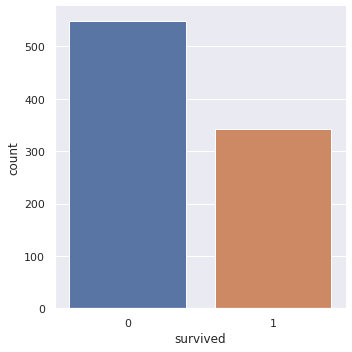

In [34]:
sns.factorplot('survived',data=titanic,kind="count")
titanic['fare'].value_counts().sort_index

In [ ]:
### No necesariamente a mayor valor del ticket mas sobrevivientes

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
          count  sum      mean
class                         
First       216  136  0.629630
Second      184   87  0.472826
Third       491  119  0.242363

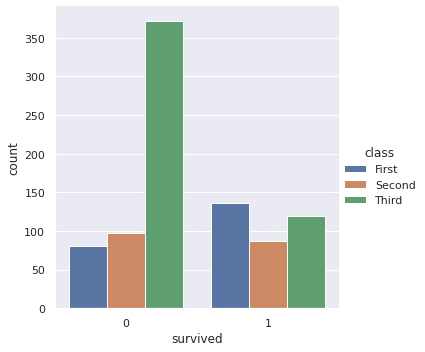

In [39]:
sns.factorplot('survived',data=titanic,hue='class',kind="count")

titanic[['class', 'survived']].groupby(['class'], as_index=False).agg(['count','sum','mean'])

In [ ]:
### El numero de sobrevivientes para la primera clase es el mas alto, en correlación la tercera clase cuenta con el mayor numero de muertes respecto al total de personas en esta seccion

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


survived               
          count  sum      mean
sex                           
female      314  233  0.742038
male        577  109  0.188908

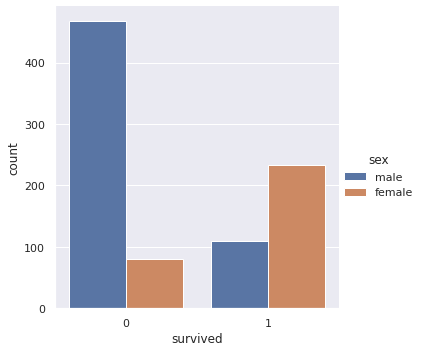

In [59]:

sns.factorplot('survived',data=titanic,hue='sex',kind="count")

titanic[['sex', 'survived']].groupby(['sex'], as_index=False).agg(['count','sum','mean'])

In [ ]:
###El porcentaje de mujeres que sobrevivió es mas alto

In [63]:
titanic['sex_2'] = titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,sibsp,parch,sex_2
0,0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1.0,0.0,1
1,1,1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.0,0.0,0
2,1,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0.0,0.0,0
3,1,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,1.0,0.0,0
4,0,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,Southampton,no,True,0.0,0.0,1
887,1,1,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True,0.0,0.0,0
888,0,3,female,NaN,23.4500,S,Third,woman,False,Southampton,no,False,1.0,2.0,0
889,1,1,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True,0.0,0.0,1


In [64]:
titanic['alone_2'] = titanic['alone'].map( {False: 0, True: 1} ).astype(int)
titanic

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,sibsp,parch,sex_2,alone_2
0,0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False,1.0,0.0,1,0
1,1,1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False,1.0,0.0,0,0
2,1,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True,0.0,0.0,0,1
3,1,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False,1.0,0.0,0,0
4,0,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,Southampton,no,True,0.0,0.0,1,1
887,1,1,female,19.0,30.0000,S,First,woman,False,Southampton,yes,True,0.0,0.0,0,1
888,0,3,female,NaN,23.4500,S,Third,woman,False,Southampton,no,False,1.0,2.0,0,0
889,1,1,male,26.0,30.0000,C,First,man,True,Cherbourg,yes,True,0.0,0.0,1,1


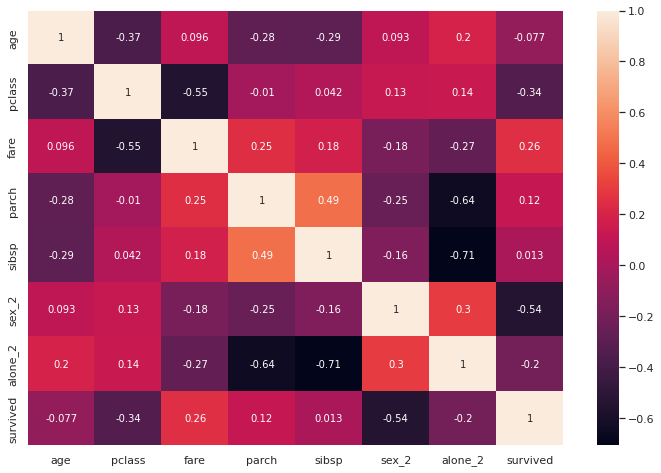

In [66]:
variables=['age', 'pclass','fare', 'parch','sibsp', 'sex_2', 'alone_2', 'survived']
corr = titanic[variables].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [ ]:
##Las variables que están directamente correlacionadas con la supervivencia son:
##la clase tiene una correlación negativa, ya que conforme decrece el numero de la clase, aumenta la cantidad de sobrevivientes 
##de igual forma sexo tiene una correlación negativa ya que el valor que se le dio a los hombres es 1, entonces conforme decrecen los sobrevivientes (numero cero), la cantidad de hombres aumenta
##el precio del ticket tiene una correlación positiva, a mayor el precio, mayor la cantidad de sobrevivientes
##existe tambien una correlación entre las personas que viajaban solas y sus probabilidades de sobrevivir, a mayor el numero de personas solas, menor el numero de sobrevivientes
##en menor medida las personas con padres/hijos también presentan una correlación positiva con la cantidad de sobrevivientes
